In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # For mathematical calculations 
import pandas as pd                # For data preprocessing, reading/writing CSV files

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # for graph plots
import matplotlib.pyplot as plt      
import seaborn as sns              # for data Visualization
            
%matplotlib inline
'''Plotly Visualizations'''
import matplotlib as plotly      # for Interactive Graphing Library
from matplotlib import cm        # for colormaps in matplotlib 
from plotly.offline import plot  # for creating graphs that can be saved in computer & viewed in html     

'''Machine Learning'''
import sklearn
from sklearn import preprocessing   # for data understanding and data preprocessing
from sklearn import metrics         # for evaluation prediction results
from sklearn.metrics import r2_score, mean_squared_error    # for prediction & evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder    # for encoding categorical columns
from sklearn.model_selection import train_test_split              # for training the data
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge   # for Linear Regression, L1,L2
from sklearn.model_selection import cross_val_score # for cross validation 

'''For Runtime Warnings''' 
import warnings
from pandas.core.common import SettingWithCopyWarning    # for warnings while copying datasets & columns
warnings.filterwarnings("ignore", category=RuntimeWarning)  # to avoid runtime warnings
# I was getting divide by zero error so I added this

In [2]:
'''Read Data from csv file'''
df_sleep = pd.read_csv(r'14-DataA.csv')

In [3]:
df_sleep.head()

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
0,Female,2022-05-05 03:45:00,2022-05-05 12:30:00,0 days 08:45:00,Okay,1.25,5.5,2,True,True,61
1,Female,2022-05-05 23:15:00,2022-05-06 06:30:00,0 days 07:15:00,Okay,1.50,8.0,3,True,False,40
2,Male,2022-05-05 22:30:00,2022-05-06 06:00:00,0 days 07:30:00,Healthy,2.25,8.5,3,True,False,41
3,Male,2022-05-05 03:00:00,2022-05-05 17:00:00,0 days 14:00:00,Sick,2.50,7.5,3,True,False,42
4,Male,2022-05-05 00:15:00,2022-05-05 06:30:00,0 days 06:15:00,Okay,1.75,10.0,4,False,True,42


In [4]:
df_sleep.tail()

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
9995,Female,2022-05-05 19:15:00,2022-05-06 01:30:00,0 days 06:15:00,Healthy,2.25,10.0,3,False,True,52
9996,Female,2022-05-05 18:15:00,2022-05-06 05:30:00,0 days 11:15:00,Sick,2.25,7.5,3,True,True,67
9997,Male,2022-05-05 21:00:00,2022-05-06 03:00:00,0 days 06:00:00,Healthy,2.50,6.0,2,True,True,69
9998,Female,2022-05-05 19:00:00,2022-05-06 01:00:00,0 days 06:00:00,Healthy,2.00,7.5,3,True,True,40
9999,Male,2022-05-05 21:15:00,2022-05-06 08:30:00,0 days 11:15:00,Sick,1.75,9.0,3,False,False,51


## Understanding our Data

###### Check columns of dataframe

In [5]:
df_sleep.columns

Index(['Gender', 'Sleep_time', 'Wake_up_time', 'Sleep_duration',
       'Health_status', 'Screentime_before_sleep_hrs', 'Workhours',
       'Meal_intake', 'Smoking', 'Drinking', 'Sleep_Quality_%'],
      dtype='object')

In [6]:
df_sleep.describe()

,Screentime_before_sleep_hrs,Workhours,Meal_intake,Sleep_Quality_%
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.815200,8.101100,3.029200,52.252600
std,0.570587,1.425914,0.986532,10.172529
min,0.250000,5.000000,1.000000,40.000000
25%,1.500000,7.500000,3.000000,42.000000
50%,2.000000,8.500000,3.000000,51.000000
75%,2.250000,9.500000,4.000000,63.000000
max,2.500000,10.000000,4.000000,69.000000


In [7]:
print(df_sleep.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                               min   max     mean
Screentime_before_sleep_hrs   0.25   2.5   1.8152
Meal_intake                   1.00   4.0   3.0292
Workhours                     5.00  10.0   8.1011
Sleep_Quality_%              40.00  69.0  52.2526


In [8]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       10000 non-null  object 
 1   Sleep_time                   10000 non-null  object 
 2   Wake_up_time                 10000 non-null  object 
 3   Sleep_duration               10000 non-null  object 
 4   Health_status                10000 non-null  object 
 5   Screentime_before_sleep_hrs  10000 non-null  float64
 6   Workhours                    10000 non-null  float64
 7   Meal_intake                  10000 non-null  int64  
 8   Smoking                      10000 non-null  bool   
 9   Drinking                     10000 non-null  bool   
 10  Sleep_Quality_%              10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 722.8+ KB


In [9]:
df_sleep.isnull().sum().sort_values(ascending=False)

Gender                         0
Sleep_time                     0
Wake_up_time                   0
Sleep_duration                 0
Health_status                  0
Screentime_before_sleep_hrs    0
Workhours                      0
Meal_intake                    0
Smoking                        0
Drinking                       0
Sleep_Quality_%                0
dtype: int64

In [10]:
df_sleep.shape

(10000, 11)

In [11]:
df_sleep.nunique()

Gender                          3
Sleep_time                     40
Wake_up_time                   64
Sleep_duration                 36
Health_status                   3
Screentime_before_sleep_hrs    10
Workhours                      11
Meal_intake                     4
Smoking                         2
Drinking                        2
Sleep_Quality_%                20
dtype: int64

### Categorical Data

In [12]:
categorical_columns = df_sleep.select_dtypes(exclude=[np.number])
categorical_columns.describe()

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Smoking,Drinking
count,10000,10000,10000,10000,10000,10000,10000
unique,3,40,64,36,3,2,2
top,Male,2022-05-05 18:15:00,2022-05-06 04:30:00,0 days 05:15:00,Healthy,True,True
freq,4977,282,421,419,4205,6083,6125


<AxesSubplot:xlabel='Gender', ylabel='count'>

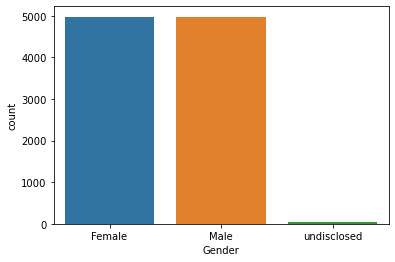

In [13]:
sns.countplot(x='Gender', data=df_sleep)

<AxesSubplot:xlabel='Sleep_time', ylabel='count'>

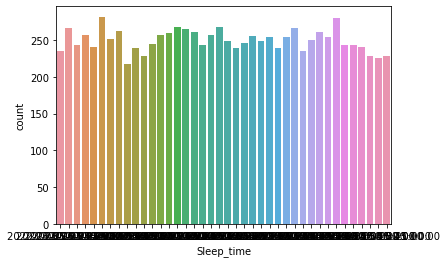

In [14]:
sns.countplot(x='Sleep_time', data=df_sleep)

<AxesSubplot:xlabel='Wake_up_time', ylabel='count'>

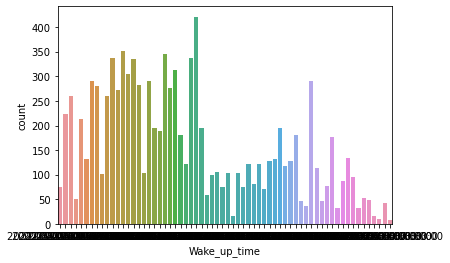

In [15]:
sns.countplot(x='Wake_up_time', data=df_sleep)

<AxesSubplot:xlabel='Sleep_duration', ylabel='count'>

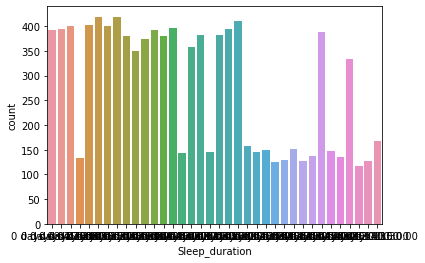

In [16]:
sns.countplot(x='Sleep_duration', data=df_sleep)

<AxesSubplot:xlabel='Health_status', ylabel='count'>

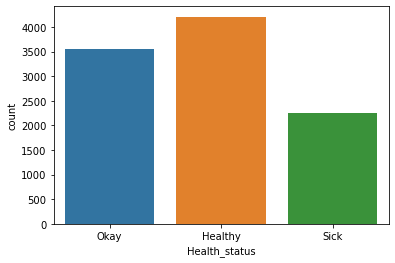

In [17]:
sns.countplot(x='Health_status', data=df_sleep)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

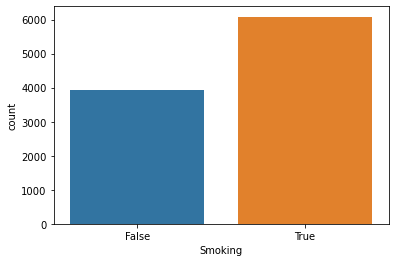

In [18]:
sns.countplot(x='Smoking', data=df_sleep)

<AxesSubplot:xlabel='Drinking', ylabel='count'>

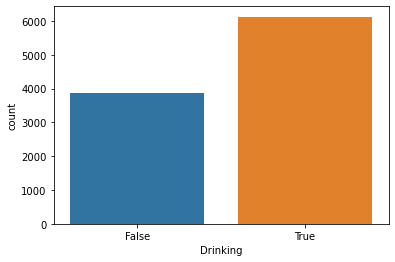

In [19]:
sns.countplot(x='Drinking', data=df_sleep)

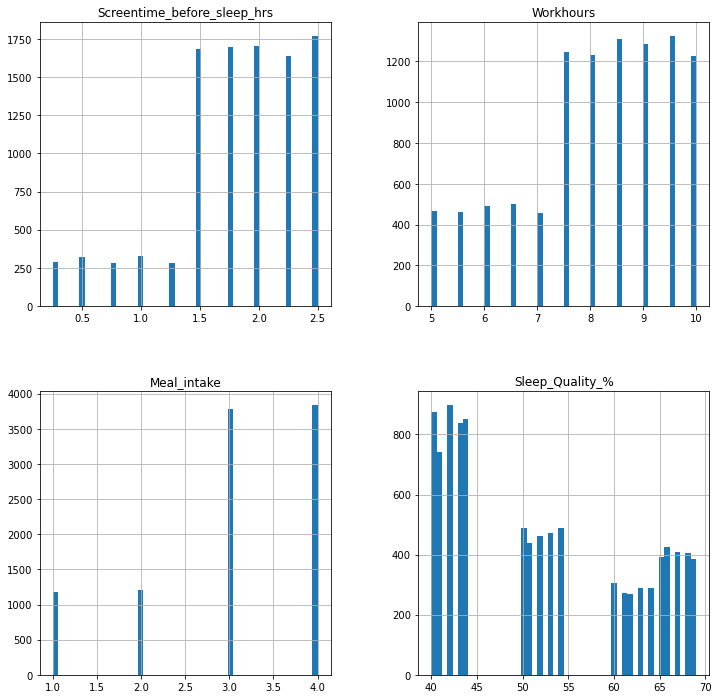

In [20]:
final_Df = df_sleep
final_Df.hist(bins=50, figsize = (12,12))
plt.show()

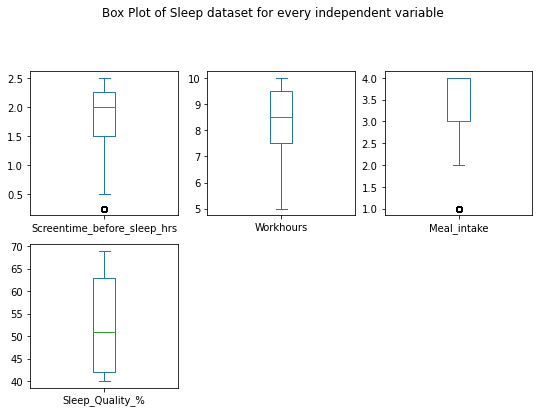

In [21]:
final_Df[['Screentime_before_sleep_hrs','Workhours','Meal_intake','Sleep_Quality_%']].plot(kind='box', subplots=True, layout=(3,3), sharex =False, sharey=False, figsize=(9,9), title='Box Plot of Sleep dataset for every independent variable')
plt.show()

In [32]:
median = np.median(final_Df.Screentime_before_sleep_hrs)
median

2.0